## Santa's Uncertain Bags EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['axes.linewidth'] = 0.5

In [3]:
data = pd.read_csv('gifts.csv')

In [4]:
df = pd.DataFrame()
df['id'] = data['GiftId'].apply(lambda x: x.split('_')[1])
df['type'] = data['GiftId'].apply(lambda x: x.split('_')[0])
df['type'] = [x.title() for x in df['type']]
df['type'].unique()

array(['Horse', 'Ball', 'Bike', 'Train', 'Coal', 'Book', 'Doll', 'Blocks',
       'Gloves'], dtype=object)

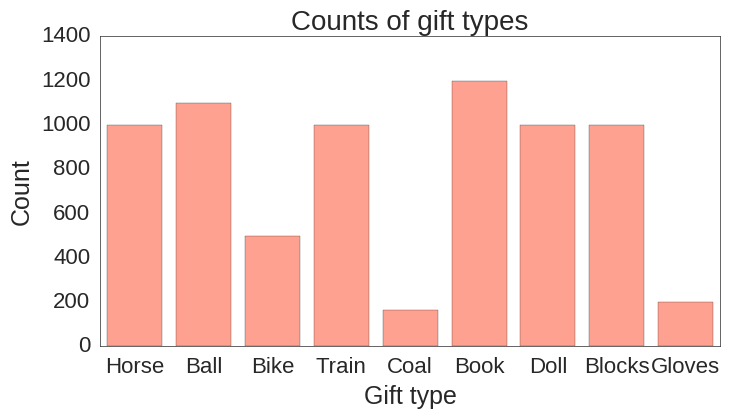

In [5]:
fig = plt.figure(figsize=(8,4))
plt.tick_params(labelsize=16)

sns.countplot(x=df.type, color='tomato', saturation=1, alpha=0.6)

plt.xlabel('Gift type', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Counts of gift types', fontsize=20)
plt.ylim(0, 1400)
plt.show()

In [6]:
def weight(gift):
    if gift == 'Horse':
        return max(0, np.random.normal(5,2,1)[0])
    if gift == 'Ball':
        return max(0, 1 + np.random.normal(1,0.3,1)[0])
    if gift == 'Bike':
        return max(0, np.random.normal(20,10,1)[0])
    if gift == 'Train':
        return max(0, np.random.normal(10,5,1)[0])
    if gift == 'Coal':
        return 47 * np.random.beta(0.5,0.5,1)[0]
    if gift == 'Book':
        return np.random.chisquare(2,1)[0]
    if gift == 'Doll':
        return np.random.gamma(5,1,1)[0]
    if gift == 'Blocks':
        return np.random.triangular(5,10,20,1)[0]
    if gift == 'Gloves':
        return 3.0 + np.random.rand(1)[0] if np.random.rand(1) < 0.3 else np.random.rand(1)[0]

In [7]:
df['weight'] = df['type'].apply(lambda x: weight(x))

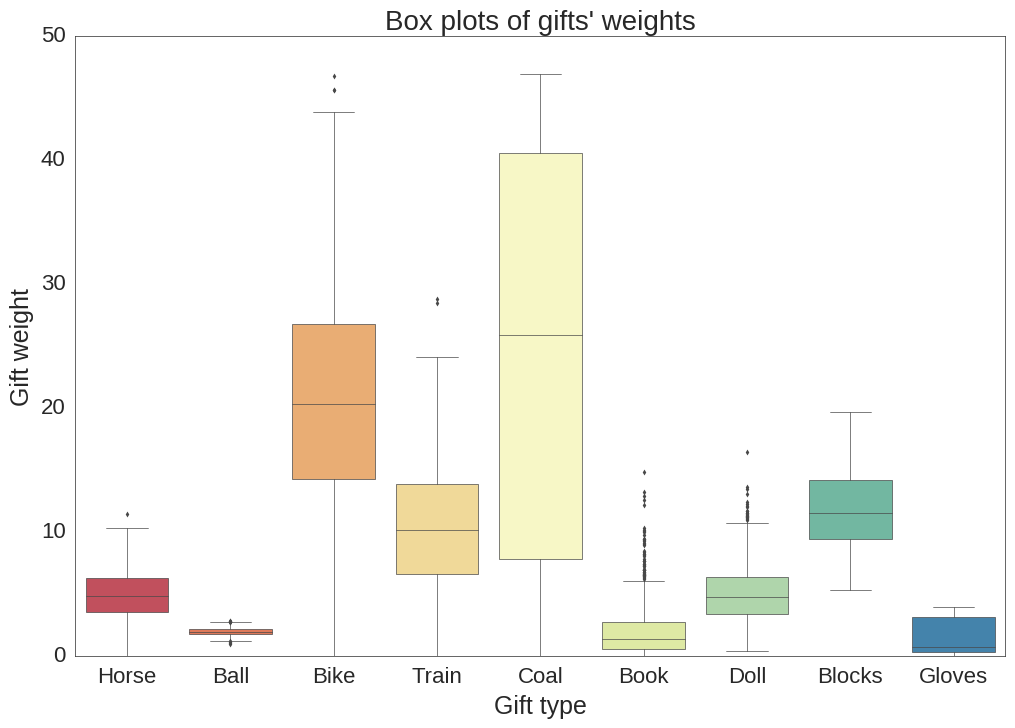

In [8]:
fig = plt.figure(figsize=(12,8))
plt.tick_params(labelsize=16)

sns.boxplot(x=df['type'], y=df.weight, palette='Spectral', linewidth=0.5, fliersize=3)

plt.xlabel('Gift type', fontsize=18)
plt.ylabel('Gift weight', fontsize=18)
plt.title('Box plots of gifts\' weights', fontsize=20)
plt.show()

In [9]:
def plot_distribution(gift_type):
    fig = plt.figure(figsize=(8,4))
    plt.tick_params(labelsize=16)

    sns.distplot(df[df['type']==gift_type]['weight'], bins=10,
                 color='tomato', hist_kws={'alpha': 0.6}, kde_kws={'lw': 5})

    plt.xlabel('Weight', fontsize=18)
    plt.title(gift_type+' weights distribution', fontsize=20)
    plt.show()

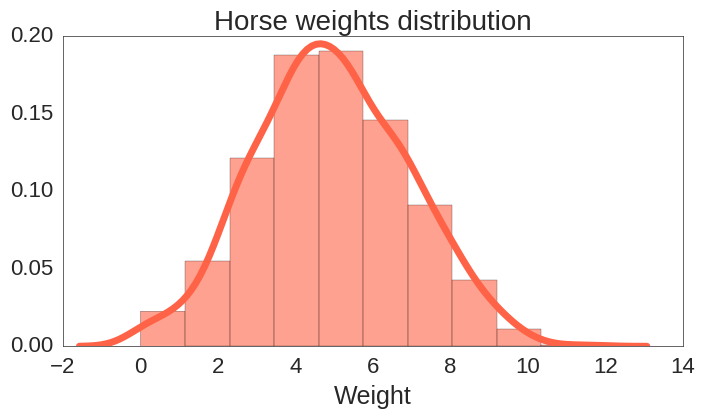

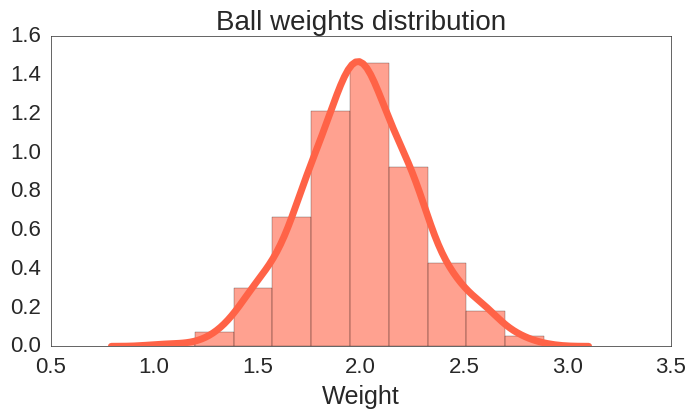

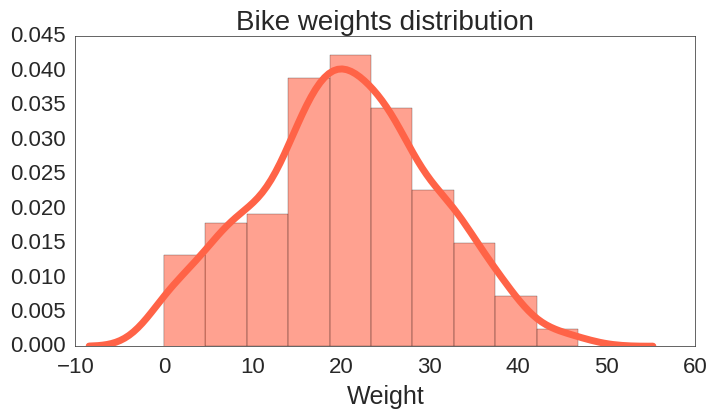

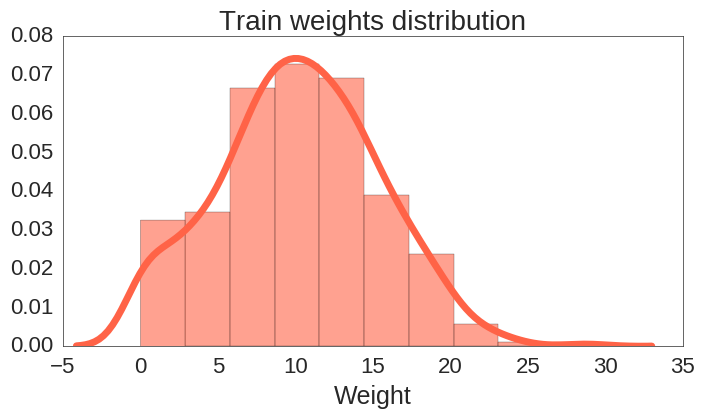

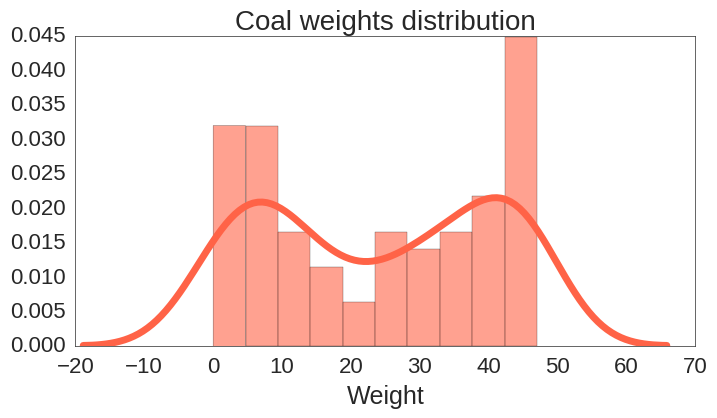

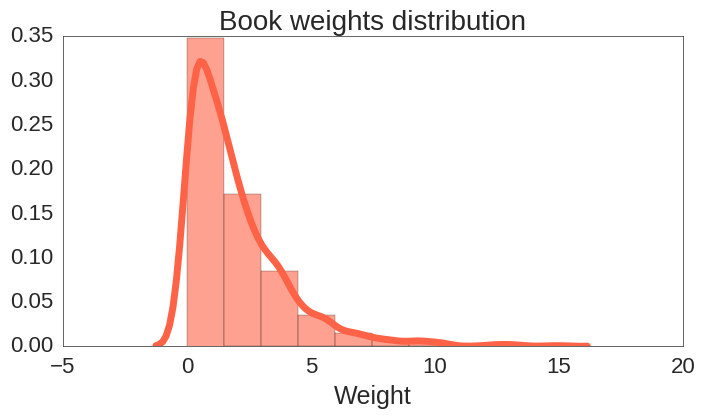

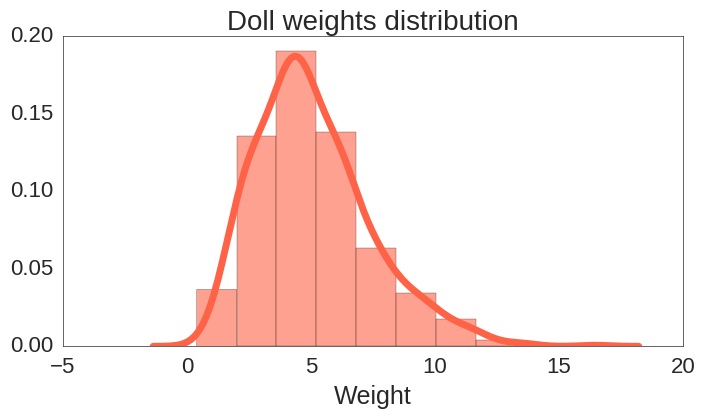

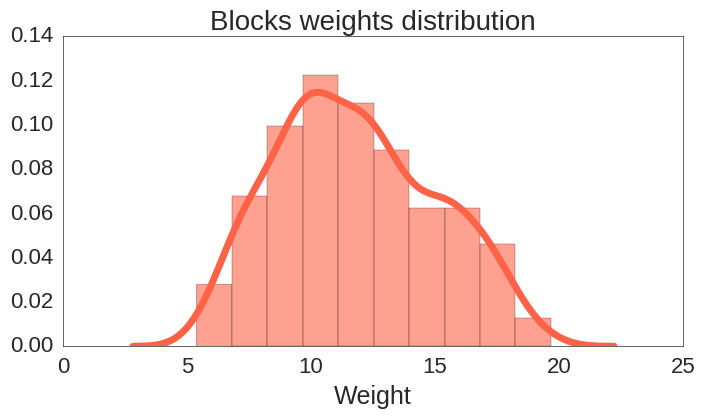

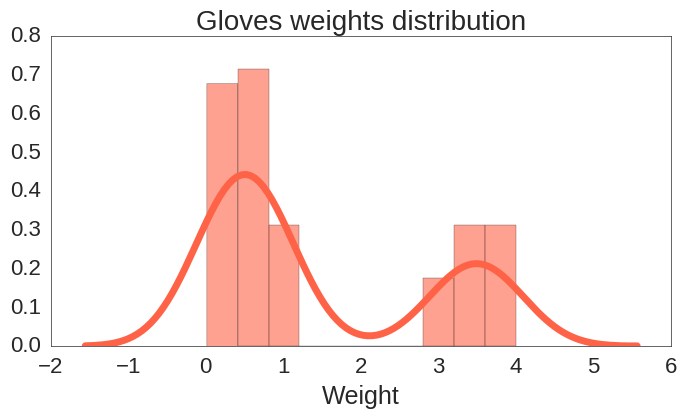

In [10]:
for gift_type in df['type'].unique():
    plot_distribution(gift_type)